<a href="https://colab.research.google.com/github/srijaghosh2015/Emojional/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflowjs
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflowjs as tfjs
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
import itertools



!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
!wget https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sheep.npy



     |████████████████████████████████| 64 kB 1.2 MB/s 
--2021-08-15 16:50:51--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 108.177.11.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96590448 (92M) [application/octet-stream]
Saving to: ‘cat.npy’

cat.npy             100%[===================>]  92.12M   156MB/s    in 0.6s    

2021-08-15 16:50:52 (156 MB/s) - ‘cat.npy’ saved [96590448/96590448]

--2021-08-15 16:50:52--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sheep.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.134.128, 74.125.139.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98

(123202, 784)
(126121, 784)
Epoch 1/10
50/50 [==============================] - 30s 181ms/step - loss: 0.5117 - accuracy: 0.7494 - val_loss: 0.2268 - val_accuracy: 0.9114
Epoch 2/10
50/50 [==============================] - 8s 156ms/step - loss: 0.2240 - accuracy: 0.9145 - val_loss: 0.1772 - val_accuracy: 0.9332
Epoch 3/10
50/50 [==============================] - 8s 155ms/step - loss: 0.1792 - accuracy: 0.9331 - val_loss: 0.1610 - val_accuracy: 0.9395
Epoch 4/10
50/50 [==============================] - 8s 155ms/step - loss: 0.1517 - accuracy: 0.9447 - val_loss: 0.1499 - val_accuracy: 0.9449
Epoch 5/10
50/50 [==============================] - 8s 159ms/step - loss: 0.1413 - accuracy: 0.9485 - val_loss: 0.1428 - val_accuracy: 0.9469
Epoch 6/10
50/50 [==============================] - 8s 163ms/step - loss: 0.1381 - accuracy: 0.9483 - val_loss: 0.1339 - val_accuracy: 0.9507
Epoch 7/10
50/50 [==============================] - 8s 162ms/step - loss: 0.1211 - accuracy: 0.9549 - val_loss: 0.1276 

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


CNN accuracy:  0.9551
Confusion matrix, without normalization
[[4682  300]
 [ 149 4869]]


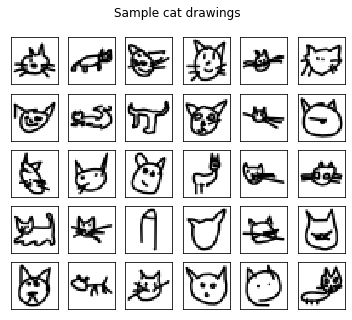

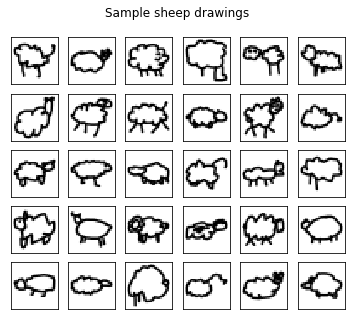

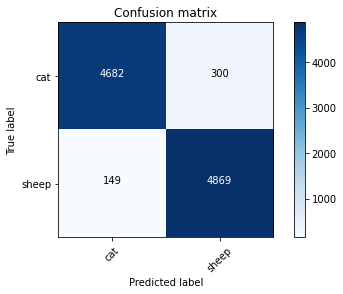

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


0.9916913123194077

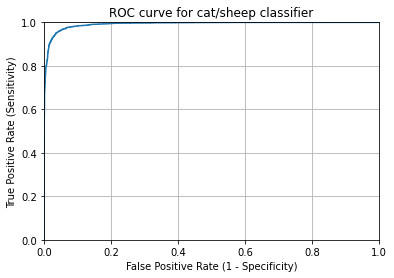

In [ ]:
cat = np.load('/content/cat.npy')
sheep = np.load('/content/sheep.npy')

print(cat.shape)
print(sheep.shape)

cat = np.c_[cat, np.zeros(len(cat))]
sheep = np.c_[sheep, np.ones(len(sheep))]

def plot_samples(input_array, rows=5, cols=6, title=''):
    
    
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 5)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_samples(cat, title='Sample cat drawings\n')
plot_samples(sheep, title='Sample sheep drawings\n')
X = np.concatenate((cat[:10000,:-1], sheep[:10000,:-1]), axis=0).astype('float32') 
y = np.concatenate((cat[:10000,-1], sheep[:10000,-1]), axis=0).astype('float32') 


X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]


X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')


def cnn_model():
    
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=( 28, 28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model





np.random.seed(0)

model_cnn = cnn_model()

model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=10, batch_size=200)

scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)

print('Final CNN accuracy: ', scores[1])

y_pred_cnn = model_cnn.predict_classes(X_test_cnn, verbose=0)
acc_cnn = accuracy_score(y_test, y_pred_cnn)
print ('CNN accuracy: ',acc_cnn)


converter = tfjs.converters.save_keras_model(model_cnn,'/content/jsmodel')



cnf_matrix = confusion_matrix(y_test, y_pred_cnn)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['cat','sheep'],
                      title='Confusion matrix')

plt.show()

y_pred_prob = model_cnn.predict_proba(X_test_cnn, verbose=0)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


plt.plot(fpr, tpr)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve for cat/sheep classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


roc_auc_score(y_test, y_pred_prob)

In [ ]:
model_cnn.save_weights("weights.h5")

In [ ]:
model_cnn.save("my_model.h5")

In [ ]:
!mkdir model
!tensorflowjs_converter --input_format keras my_model.h5 model/

2021-08-15 16:52:49.303419: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 8%)
  adding: model/model.json (deflated 80%)


In [ ]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>